# Task selection during free exploration (all experimental modalities)

[Cumulative action selection](#A1)

[Accuracy during the free exploration phase](#A2)

[Task switching by number of people](#A3)

[Average cumulative task switching in time](#A4)

[Number of times people return to a task](#A5)

[Selection dynamics of 1D and R](#A6)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import warnings

from ipywidgets import widgets
from IPython.html.widgets import *

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

/usr/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
execute_notebook("file-preprocessing.ipynb")

[b'free']


In [3]:
tasks = 4
catLab = ['1D', 'I1D', '2D', 'R']

usersF = np.shape(np.unique(csvIntF[:,0]))[0]
# For free exploration with Training
usersFT = np.shape(np.unique(csvIntFT[:,0]))[0]
usersFTI = np.shape(np.unique(informed[:,0]))[0]
usersFTU = usersFT-usersFTI
# For strategic learning
usersS = np.shape(np.unique(csvIntS[:,0]))[0]
usersSI = np.shape(np.unique(informedSE[:,0]))[0]
usersSU = usersS-usersSI

<a id='A1'></a>
## Cumulative action-selection

Number of occasions a task has been selected at a specific point in time

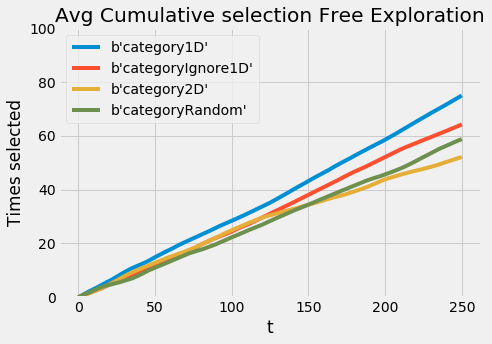

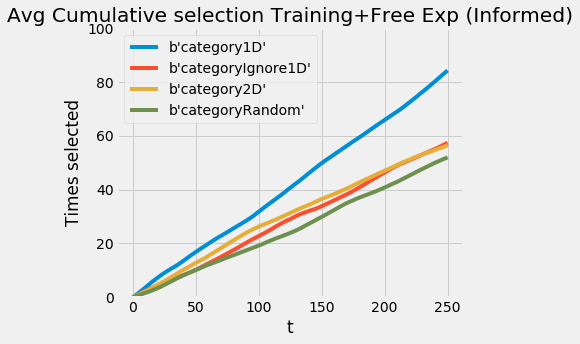

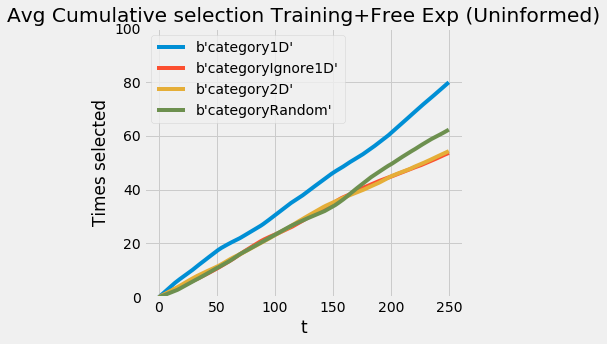

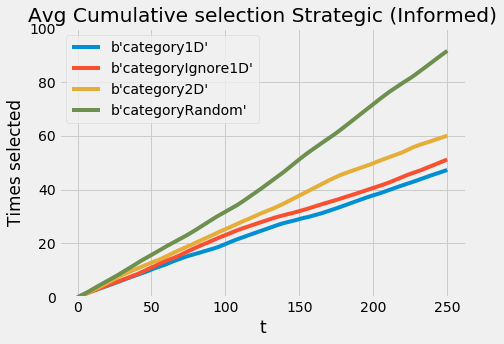

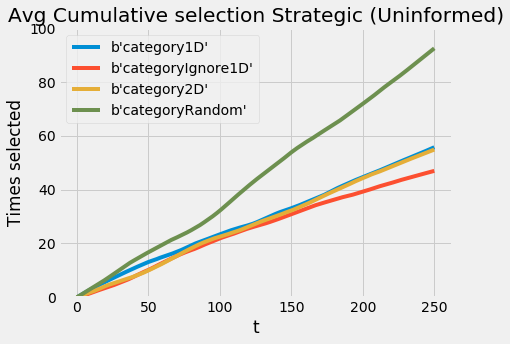

In [4]:
def plotCumSelec(arra, usersArr, title):
    
    # Count at each point in time number of occurrences up to that point and save it into a list
    def countInTime(arr, numOfValues):
        counts = []
        # trials = len(arr)+1
        # print(trials)
        # Only consider the official 250 trials
        trials = 251
        for i in range(trials):
            count = [(arr[:i] == e).sum() for e in range(numOfValues)]
            counts.append(count)
        return np.array(counts).T
    
    # Every element holds a matrix of the evolution of selection
    # Each column corresponds to a t where the max t=250 (it starts at t=0 though)
    # Each column corresponds to the cumulative selection of a task at time t
    cumCounts = []
    for u in range(usersArr):
        # Cumulative count for user u per task
        cumCounts.append( countInTime(arra[u][:,1], tasks) )

    # Dimensions 201x4x251 (201 users, 4 tasks, 251 time steps)
    # Get averages and std dev
    cumCounts = np.asarray(cumCounts)
    avg = np.mean(cumCounts, axis=0)
    std = np.std(cumCounts, axis=0)

    fig, ax = plt.subplots(figsize=(7, 5))

    for t in range(tasks):
        graph = ax.plot(avg[t,:], label=categories[t])

    #     color = graph[0].get_color()
    #     ax.plot(avg[t,:]+std[t,:], color, alpha=0.15)
    #     plt.plot(avg[t,:]-std[t,:], color, alpha=0.15)
    ax.legend()
    ax.set_title(''.join(['Avg Cumulative selection ', title]))
    ax.set_ylabel('Times selected')
    ax.set_xlabel('t')
    ax.set_ylim([0,100])

    plt.tight_layout()
    plt.show()

plotCumSelec(splitCsvF, usersF, 'Free Exploration')
plotCumSelec(splitCsvFTI, usersFTI, 'Training+Free Exp (Informed)')
plotCumSelec(splitCsvFTU, usersFTU, 'Training+Free Exp (Uninformed)')
plotCumSelec(splitCsvSI, usersSI, 'Strategic (Informed)')
plotCumSelec(splitCsvSU, usersSU, 'Strategic (Uninformed)')
#plotCumSelec(splitCsvFT, users2, '(All subjects)')

<a id='A2'></a>
## Performance and Accuracy during the Free Exploration phase

In [5]:
def getCorrect(arr, usersArr):
    corrUser = []
    for u in range(usersArr):
        # Cumulative count for user u per task
        corrTask = []
        for t in range(tasks):
            # Calculate accuracy here since trials are dynamic
            correct = np.sum(arr[u][arr[u][:,1]==t, 2])
            total = np.shape(arr[u][arr[u][:,1]==t, 2])[0]
            #print(correct, total, correct/total)
            #corrTask.append(np.sum(arr[u][arr[u][:,1]==t, 2]))
            corrTask.append(correct/total)
        corrUser.append(corrTask)
    return np.asarray(corrUser)

In [7]:
# Free exp
corrF = getCorrect(splitCsvF, usersF)

# csvTest only contains the subset of results that were observed during the testing phase
# Split by condition
#csvTest = np.delete(csvTest, 2, axis = 1)
infoFT = csvIntFTECond[csvIntFTECond[:,1]==0]
uninfoFT = csvIntFTECond[csvIntFTECond[:,1]==1]
# Delete condition column
infoFT = np.delete(infoFT, 1, axis=1)
uninfoFT = np.delete(uninfoFT, 1, axis=1)
# Split by users
splitFTI = [infoFT[infoFT[:,0]==i] for i in np.unique(infoFT[:,0])]
splitFTU = [uninfoFT[uninfoFT[:,0]==i] for i in np.unique(uninfoFT[:,0])]

corrFTU = getCorrect(splitFTU, usersFTU)
corrFTI = getCorrect(splitFTI, usersFTI)

infoS = csvIntSECond[csvIntSECond[:,1]==0]
uninfoS = csvIntSECond[csvIntSECond[:,1]==1]
# Delete condition column
infoS = np.delete(infoS, 1, axis=1)
uninfoS = np.delete(uninfoS, 1, axis=1)
# Split by users
splitSI = [infoS[infoS[:,0]==i] for i in np.unique(infoS[:,0])]
splitSU = [uninfoS[uninfoS[:,0]==i] for i in np.unique(uninfoS[:,0])]

corrSU = getCorrect(splitSU, usersSU)
corrSI = getCorrect(splitSI, usersSI)

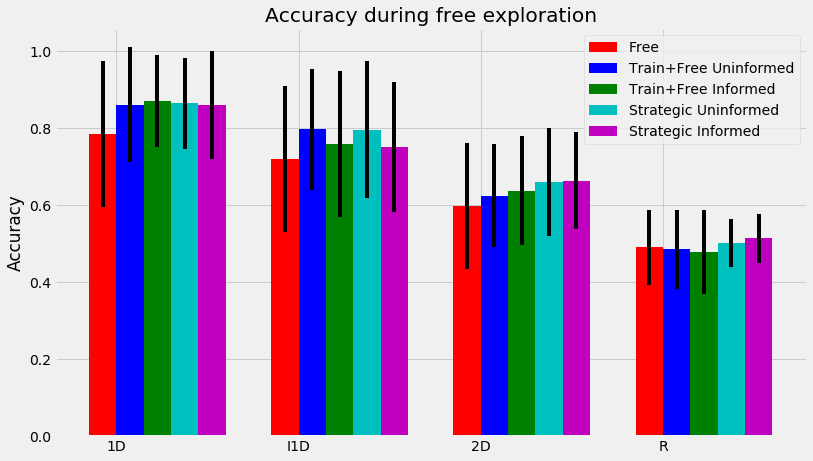

In [8]:
ind = np.arange(tasks)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(ind, np.nanmean(corrF,axis=0), width, color='r', yerr=np.nanstd(corrF,axis=0))

rects2 = ax.bar(ind+width, np.nanmean(corrFTU,axis=0), width, color='b', yerr=np.nanstd(corrFTU,axis=0))
rects3 = ax.bar(ind+width*2, np.nanmean(corrFTI,axis=0), width, color='g', yerr=np.nanstd(corrFTI,axis=0))

rects4 = ax.bar(ind+width*3, np.nanmean(corrSU,axis=0), width, color='c', yerr=np.nanstd(corrSU,axis=0))
rects5 = ax.bar(ind+width*4, np.nanmean(corrSI,axis=0), width, color='m', yerr=np.nanstd(corrSI,axis=0))

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy during free exploration')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1D', 'I1D', '2D', 'R'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), 
          ('Free', 'Train+Free Uninformed', 'Train+Free Informed', 'Strategic Uninformed', 'Strategic Informed'))


<a id='A3'></a>
## Task switching by number of subjects

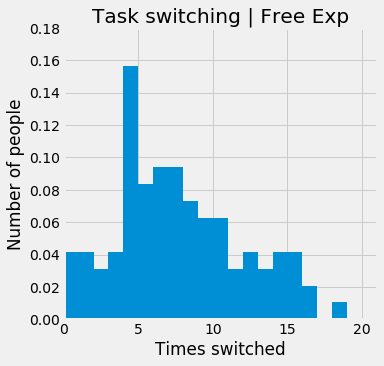

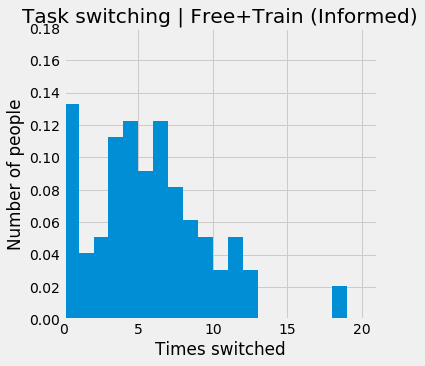

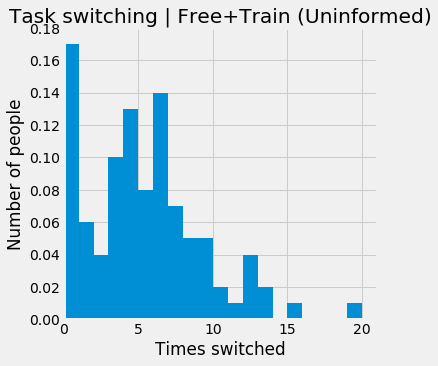

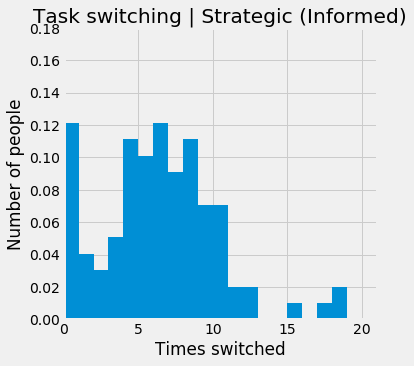

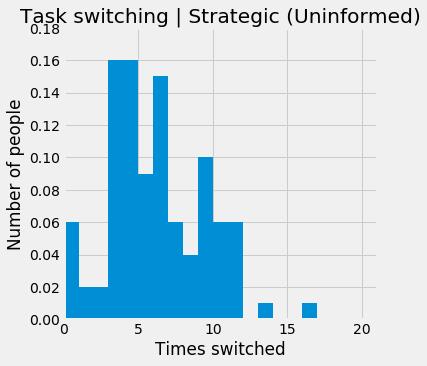

In [9]:
# Count the number of times subjects switched to another task during free exploration
def plotCountSwitchTask(arr, usersArr, title, outliers=False):
    fig, ax = plt.subplots(figsize=(5, 5))
    switchInExperiment = []
    switchInTimeUsers = []
    for u in range(usersArr):
        c = 0
        # Tracks number of task switching at each time step (per user)
        switchInTime = []
        # to homogenize truncate to the standard 250 trials
        for i in range(249): #(len(splitCsv[us][:,1])-1):
            # Check if the task selected now is the same as the task selected one step into the future
            # if that isn't the case then increase the switch counter
            # task has to be column 1
            if arr[u][i,1] != arr[u][i+1,1]:
                c+=1
            switchInTime.append(c)
        # Include or do not include outliers
        if outliers:
            switchInExperiment.append(c)
        elif c < 21:
            switchInExperiment.append(c)
            
        # This holds the evolution of task switching for all users
        switchInTimeUsers.append(switchInTime)
    plt.hist(switchInExperiment, normed=True, bins=np.arange(np.max(switchInExperiment)+1))
    
    ax.legend()
    ax.set_title(''.join(['Task switching | ', title]))
    ax.set_xlabel('Times switched')
    ax.set_ylabel('Number of people')
    ax.set_ylim([0,.18])
    ax.set_xlim([0,21])
    return switchInExperiment, np.asarray(switchInTimeUsers)

def plotEvolutionSwitchTask(arr):
    labels = ['Free Exp', 'Free+Train (All)', 'Free+Train (Informed)', 'Free+Train (Uninformed)', 
              'Strategiic (Informed)', 'Strategic (Uninformed)']
    fig, ax = plt.subplots(figsize=(5, 5))
    # Go through every instance of the experiment
    for t in range(np.shape(arr)[1]):
        graph = ax.plot(arr[:,t], label=labels[t])
    
    ax.legend()
    ax.set_title('Avg Cumulative Task Switching')
    ax.set_ylabel('Times Switched')
    ax.set_xlabel('t')
    
sw, situF = plotCountSwitchTask(splitCsvF, usersF, 'Free Exp', outliers=False)
#print(sw, np.mean(sw), np.max(sw))
#sw, situFTA = plotCountSwitchTask(splitCsv2E, users2, 'Free+Train (All)', outliers=False)
sw, situFTI = plotCountSwitchTask(splitFTI, usersFTI, 'Free+Train (Informed)', outliers=False)
#print(sw, np.mean(sw), np.max(sw))
#plt.hist(sw, bins=np.arange(np.max(sw)+1))
sw, situFTU = plotCountSwitchTask(splitFTU, usersFTU, 'Free+Train (Uninformed)',outliers=False)
#print(sw, np.mean(sw), np.max(sw))
#plt.hist(sw, bins=np.arange(np.max(sw)+1))
sw, situSI = plotCountSwitchTask(splitSI, usersSI, 'Strategic (Informed)',outliers=False)
sw, situSU = plotCountSwitchTask(splitSU, usersSU, 'Strategic (Uninformed)',outliers=False)


<a id='A4'></a>
## Average Cumulative Task Switching in time

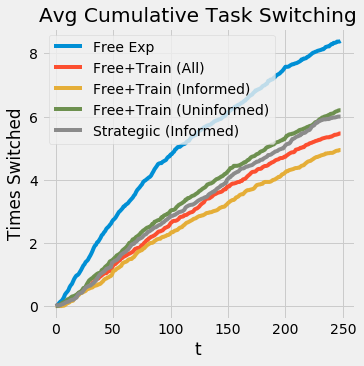

In [10]:
# Time a subject has switched tasks in time
evoSwitch = np.column_stack((np.mean(situF,axis=0), np.mean(situFTI,axis=0), np.mean(situFTU,axis=0), np.mean(situSI,axis=0), np.mean(situSU,axis=0)))
plotEvolutionSwitchTask(evoSwitch)

<a id='A5'></a>
## Returns per task across experiment modality

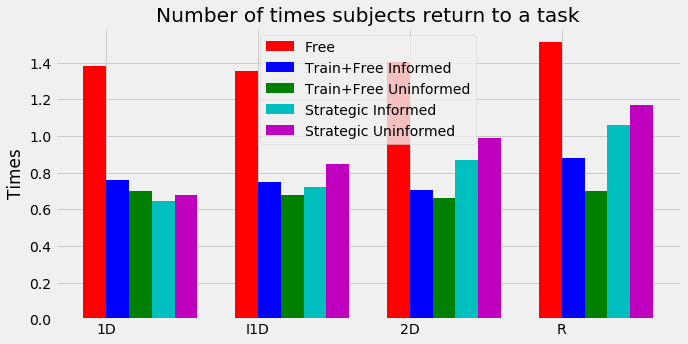

In [13]:
def countReturns(arr, usersArr):
    # Stores returns per task per user
    retUser = []
    for u in range(usersArr):
        # stores return to a task
        retTask = []
        for t in range(tasks):
            # get indices where task shows up
            ind = np.where(arr[u][:,1] == t)[0]
            # get difference between indices
            diff = np.diff(ind)
            # count instances where the difference is not 1 (i.e. they come from another task)
            numOfReturns = np.sum(diff > 1)
            retTask.append(numOfReturns)
        retUser.append(retTask)
    return retUser


retF = countReturns(splitCsvF, usersF)
#retFTA = countReturns(splitCsv2E, users2)
retFTI = countReturns(splitFTI, usersFTI)
retFTU = countReturns(splitFTU, usersFTU)
retSI = countReturns(splitSI, usersSI)
retSU = countReturns(splitSU, usersSU)

ind = np.arange(tasks)  # the x locations for the groups
width = 0.15       # the width of the bars
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(ind, np.mean(retF,axis=0), width, color='r')
rects2 = ax.bar(ind+width, np.mean(retFTI,axis=0), width, color='b')
rects3 = ax.bar(ind+width*2, np.mean(retFTU,axis=0), width, color='g')
rects4 = ax.bar(ind+width*3, np.mean(retSU,axis=0), width, color='c')
rects5 = ax.bar(ind+width*4, np.mean(retSI,axis=0), width, color='m')

# add some text for labels, title and axes ticks
ax.set_ylabel('Times')
ax.set_title('Number of times subjects return to a task')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1D', 'I1D', '2D', 'R'))
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), 
          ('Free', 'Train+Free Informed', 'Train+Free Uninformed', 'Strategic Informed', 'Strategic Uninformed'))


#Differences are small, but... could there be a case that once the random task is discovered it invites them 
#to try it more than the others?

<a id='A6'></a>
## Selection dynamics of 1D and R tasks by experiment modality

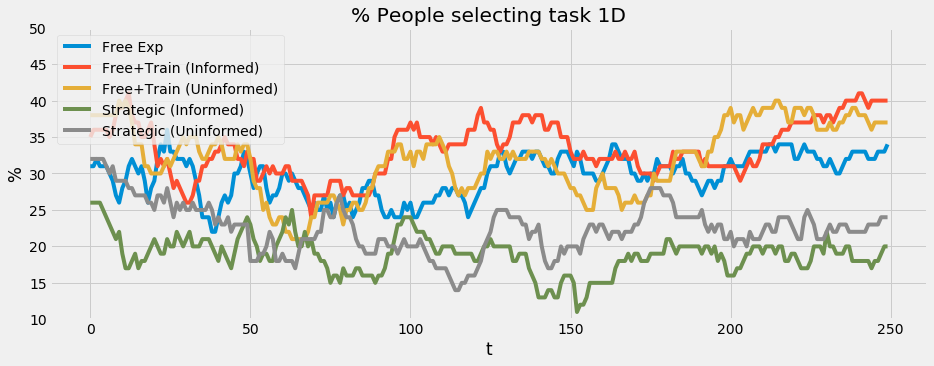

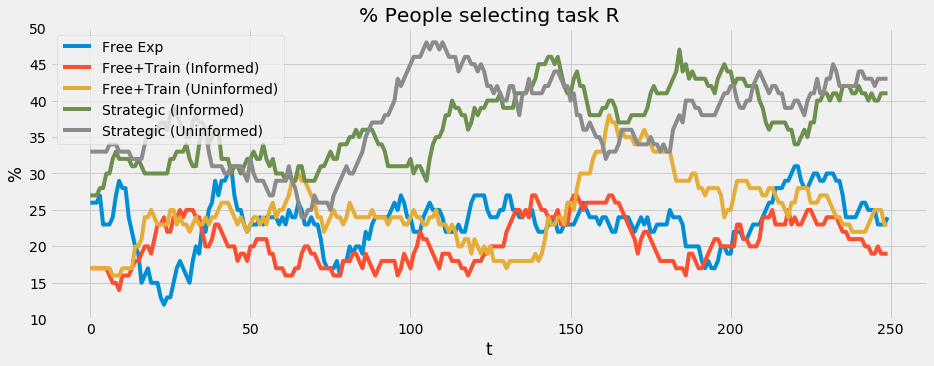

In [12]:
# How people are selecting after training
def checkFirstOption(arr, usersArr, taskToCheck):
    selec = []
    for ti in range(250):
        c = 0
        for u in range(usersArr):
            if arr[u][ti,1] == taskToCheck:
                c+=1
        selec.append(c)
    return np.asarray(selec)
        
def plotEvolutionSel(arr, tas):
    labels = ['Free Exp', 'Free+Train (Informed)', 'Free+Train (Uninformed)',
              'Strategic (Informed)', 'Strategic (Uninformed)']
    ta = ['1D', 'I1D', '2D', 'R']
    fig, ax = plt.subplots(figsize=(14, 5))
    # Go through every instance of the experiment
    for t in range(np.shape(arr)[1]):
        graph = ax.plot(arr[:,t], label=labels[t])
    
    ax.legend()
    ax.set_title(''.join(['% People selecting task ', ta[tas]]))
    ax.set_ylabel('%')
    ax.set_xlabel('t')
    ax.set_ylim([10,50])

for tas in [0,3]:
    #selFTA = checkFirstOption(splitCsv2E, users2, tas)/2
    selFTI = checkFirstOption(splitFTI, usersFTI, tas)
    selFTU = checkFirstOption(splitFTU, usersFTU, tas)
    selF = checkFirstOption(splitCsvF, usersF, tas)
    selSI = checkFirstOption(splitSI, usersSI, tas)
    selSU = checkFirstOption(splitSU, usersSU, tas)

    evoSel = np.column_stack((selF,selFTI,selFTU, selSI, selSU))
    plotEvolutionSel(evoSel, tas)